In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sci
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report

In [54]:
df = pd.read_csv('../ignore/real_molecules.csv')


/var/folders/xk/fhgbj8qj60n54b05mpfnck0w0000gn/T/ipykernel_24185/823267499.py:1: DtypeWarning: Columns (23,40,41,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../ignore/real_molecules.csv')


In [55]:
theoretical = (df['theoretical'] == 1).sum()

print(theoretical)

df.drop(['theoretical', 'deprecated'], axis=1, inplace=True)


0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49772 entries, 0 to 49771
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   formula_pretty                                49771 non-null  object 
 1   nsites                                        49772 non-null  int64  
 2   elements                                      49772 non-null  object 
 3   nelements                                     49772 non-null  int64  
 4   composition                                   49772 non-null  object 
 5   composition_reduced                           49772 non-null  object 
 6   formula_anonymous                             49772 non-null  object 
 7   chemsys                                       49772 non-null  object 
 8   volume                                        49772 non-null  float64
 9   density                                       49772 non-null 

In [57]:
'''drop attributes with significantly mostly  missing values (>95% null)'''

df.drop(['weighted_surface_energy_EV_PER_ANG2', 'weighted_surface_energy', 
         'weighted_work_function', 'surface_anisotropy', 'shape_factor', 
         'has_reconstructed', 'grain_boundaries'], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49772 entries, 0 to 49771
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   formula_pretty                                49771 non-null  object 
 1   nsites                                        49772 non-null  int64  
 2   elements                                      49772 non-null  object 
 3   nelements                                     49772 non-null  int64  
 4   composition                                   49772 non-null  object 
 5   composition_reduced                           49772 non-null  object 
 6   formula_anonymous                             49772 non-null  object 
 7   chemsys                                       49772 non-null  object 
 8   volume                                        49772 non-null  float64
 9   density                                       49772 non-null 

In [58]:
df['band_gap'].describe()

count    49772.000000
mean         1.341899
std          1.739477
min          0.000000
25%          0.000000
50%          0.265150
75%          2.443400
max         17.891400
Name: band_gap, dtype: float64

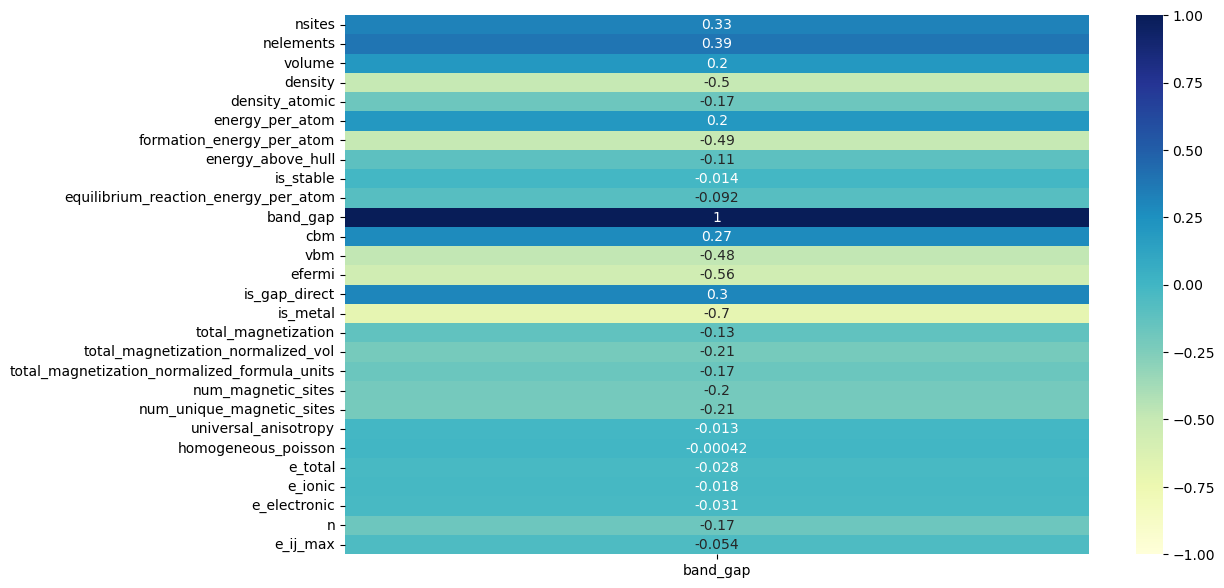

In [59]:
df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 7))
corr_matrix = numerical_df.corr()

corr_survived = corr_matrix[['band_gap']]
sns.heatmap(corr_survived, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)

plt.show()

In [60]:
categorical_df=df.select_dtypes(include=['object'])
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49772 entries, 0 to 49771
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   formula_pretty             49771 non-null  object
 1   elements                   49772 non-null  object
 2   composition                49772 non-null  object
 3   composition_reduced        49772 non-null  object
 4   formula_anonymous          49772 non-null  object
 5   chemsys                    49772 non-null  object
 6   symmetry                   49772 non-null  object
 7   property_name              49772 non-null  object
 8   material_id                49772 non-null  object
 9   structure                  49772 non-null  object
 10  decomposes_to              25618 non-null  object
 11  xas                        37228 non-null  object
 12  bandstructure              35306 non-null  object
 13  dos                        39784 non-null  object
 14  is_mag

In [61]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_colwidth', 25)
pd.set_option('display.width', 25)

In [62]:
categorical_df.head()

,formula_pretty,elements,composition,composition_reduced,formula_anonymous,chemsys,symmetry,property_name,material_id,structure,decomposes_to,xas,bandstructure,dos,is_magnetic,ordering,types_of_magnetic_species,bulk_modulus,shear_modulus,possible_species,has_props
0,O2,['O'],{'O': 1.0},{'O': 2.0},A,O,{'crystal_system': 'M...,summary,mp-1056831,c,[{'material_id': 'mp-...,NaN,NaN,NaN,False,NM,[],NaN,NaN,[],"{'materials': True, '..."
1,W,['W'],{'W': 25.0},{'W': 1.0},A,W,{'crystal_system': 'M...,summary,mp-1191581,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'L3', 'abso...",NaN,NaN,False,NM,[],NaN,NaN,[],"{'materials': True, '..."
2,Cu,['Cu'],{'Cu': 1.0},{'Cu': 1.0},A,Cu,{'crystal_system': 'M...,summary,mp-1056079,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'L3', 'abso...",NaN,NaN,True,FM,['Cu'],NaN,NaN,[],"{'materials': True, '..."
3,W,['W'],{'W': 20.0},{'W': 1.0},A,W,{'crystal_system': 'M...,summary,mp-1178801,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'L2', 'abso...",{'setyawan_curtarolo'...,{'total': {'1': {'tas...,False,NM,[],NaN,NaN,[],"{'materials': True, '..."
4,Ta,['Ta'],{'Ta': 30.0},{'Ta': 1.0},A,Ta,{'crystal_system': 'T...,summary,mp-42,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'K', 'absor...",{'setyawan_curtarolo'...,{'total': {'1': {'tas...,False,NM,[],"{'voigt': 195.607, 'r...","{'voigt': 61.792, 're...",[],"{'materials': True, '..."


In [63]:
categorical_df.drop(['elements','composition','composition_reduced','formula_anonymous',
                     'chemsys','property_name','types_of_magnetic_species','possible_species',
                     'types_of_magnetic_species','material_id'
                     ], inplace=True, axis=1)

categorical_df.head()

,formula_pretty,symmetry,structure,decomposes_to,xas,bandstructure,dos,is_magnetic,ordering,bulk_modulus,shear_modulus,has_props
0,O2,{'crystal_system': 'M...,c,[{'material_id': 'mp-...,NaN,NaN,NaN,False,NM,NaN,NaN,"{'materials': True, '..."
1,W,{'crystal_system': 'M...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'L3', 'abso...",NaN,NaN,False,NM,NaN,NaN,"{'materials': True, '..."
2,Cu,{'crystal_system': 'M...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'L3', 'abso...",NaN,NaN,True,FM,NaN,NaN,"{'materials': True, '..."
3,W,{'crystal_system': 'M...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'L2', 'abso...",{'setyawan_curtarolo'...,{'total': {'1': {'tas...,False,NM,NaN,NaN,"{'materials': True, '..."
4,Ta,{'crystal_system': 'T...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'K', 'absor...",{'setyawan_curtarolo'...,{'total': {'1': {'tas...,False,NM,"{'voigt': 195.607, 'r...","{'voigt': 61.792, 're...","{'materials': True, '..."


In [64]:
categorical_df['has_props']

0        {'materials': True, '...
1        {'materials': True, '...
2        {'materials': True, '...
3        {'materials': True, '...
4        {'materials': True, '...
                   ...           
49767    {'materials': True, '...
49768    {'materials': True, '...
49769    {'materials': True, '...
49770    {'materials': True, '...
49771    {'materials': True, '...
Name: has_props, Length: 49772, dtype: object

In [65]:
df.to_csv('../ignore/low_frequencies_removed.csv')
categorical_df.to_csv('../ignore/categorical_df.csv')
